`fairness` detect bias on regression (boston dataset)
-----

This use case is not the best one (`AGE` column is proportion of owner-occupied units built prior to 1940 and not the actual age but for a **regression** example it works ;) )

### Load packages

In [2]:
from transparentai import fairness
from transparentai.datasets import load_boston

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Load & prepare data

In [3]:
data = load_boston()
X, Y = data.drop(columns='MEDV'), data['MEDV']

Split train test

In [4]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.33, random_state=42)

### Train classifier

In [5]:
regr = LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Prepare param

In [6]:
y_true       = Y_train
y_pred       = regr.predict(X_train)
y_true_valid = Y_valid
y_pred_valid = regr.predict(X_valid)

### Use `fairness.model_bias` function

In [7]:
privileged_group = {
    'AGE':lambda x: (x > 25) & (x < 55) # Adult category
}

df_valid = data.loc[X_valid.index,:]
df_train = data.loc[X_train.index,:]

In [20]:
mean = data['MEDV'].mean()
print(mean)

22.532806324110677


In [21]:
res_train = fairness.model_bias(y_true, y_pred, 
                                df_train, privileged_group,
                                regr_split=mean)

In [22]:
res_valid = fairness.model_bias(y_true_valid, y_pred_valid, 
                                df_valid, privileged_group,
                                regr_split=mean)

In [23]:
res_train['AGE']

{'statistical_parity_difference': -0.24621212121212116,
 'disparate_impact': 0.6306818181818182,
 'equal_opportunity_difference': 0.06506679861454723,
 'average_odds_difference': -0.10000336539860874}

In [24]:
res_valid['AGE']

{'statistical_parity_difference': -0.3380952380952381,
 'disparate_impact': 0.5419354838709678,
 'equal_opportunity_difference': 0.08857142857142863,
 'average_odds_difference': -0.18356687253214538}

### Use `fairness.model_bias` function with text

In [25]:
res_valid = fairness.model_bias(y_true_valid, y_pred_valid, 
                                df_valid, privileged_group,
                                regr_split=mean,
                                returns_text=True)

In [26]:
print(res_valid['AGE'])

The privileged group is predicted with the positive output 33.81% more often than the unprivileged group. This is considered to be not fair.
The privileged group is predicted with the positive output 1.85 times more often than the unprivileged group. This is considered to be not fair.
For a person in the unprivileged group, the model predict a correct positive output 8.86% more often than a person in the privileged group. This is considered to be fair.
For a person in the privileged group, the model predict a correct positive output or a correct negative output 18.36% more often than a person in the unprivileged group. This is considered to be not fair.
The model has 1 fair metrics over 4 (25%).


### Use `fairness.plot_bias` function

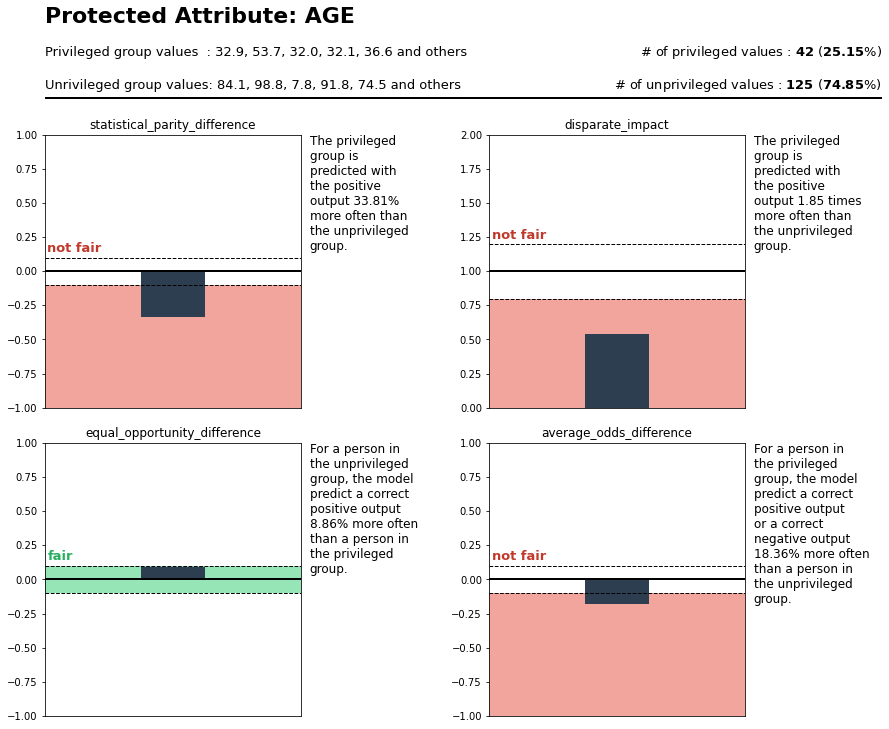

In [28]:
fairness.plot_bias(y_true_valid, y_pred_valid, 
                   df_valid, privileged_group,
                   regr_split=mean)

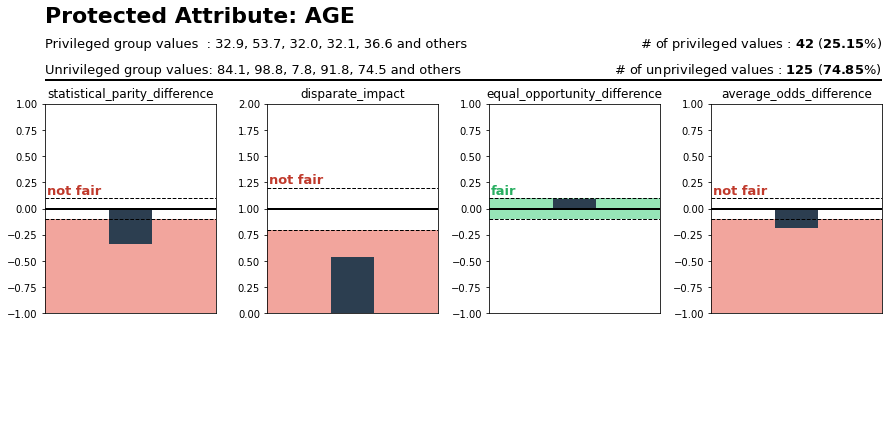

In [29]:
fairness.plot_bias(y_true_valid, y_pred_valid, 
                   df_valid, privileged_group,
                   regr_split=mean, with_text=False)

### Use `fairness.find_correlated_feature` function

In [30]:
fairness.find_correlated_feature(data, privileged_group, 
                                 corr_threshold=0.4)

{'AGE': {'ZN': -0.5695,
  'INDUS': 0.6448,
  'NOX': 0.7315,
  'DIS': -0.7479,
  'RAD': 0.456,
  'TAX': 0.5065,
  'LSTAT': 0.6023}}